# KNN Implemetation 

In [1]:
# importing libs and dataset
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_table('fruit_data_with_colors.txt')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
# here fruit_label is our dependent variable and mass,width,height,color_score are our independent variables
data.shape

(59, 7)

In [3]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [4]:
data['fruit_label'].value_counts()

3    19
1    19
4    16
2     5
Name: fruit_label, dtype: int64

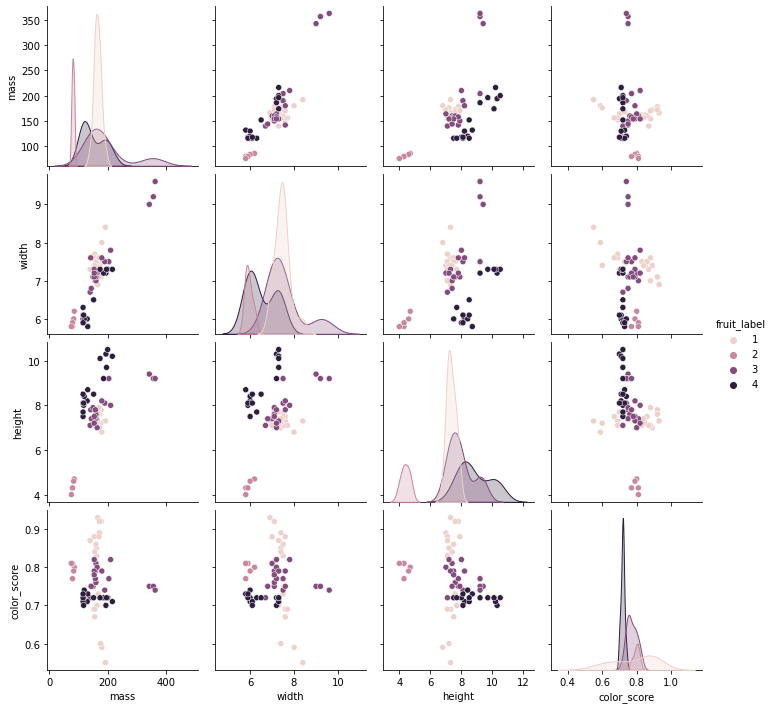

In [20]:
# lets see data visually
import seaborn as sns
sns.pairplot(data,hue='fruit_label')

In [6]:
# so we have 4 classes so its a multiclass classification problem
# now lets seperate dependent and target features in X and y
X = data[['height', 'width', 'mass', 'color_score']]
y = data['fruit_label']



In [7]:
# now lets split our data set into train set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
# model for k  = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5

In [9]:
# now lets find score for every possible value of k
def getScore(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)


In [10]:
X_train.shape

(41, 4)

In [11]:
# this means valid k lies in [1,41]
for i in range(1,42):
    print('score for {} is : {}'.format(i,getScore(i)))

score for 1 is : 0.6111111111111112
score for 2 is : 0.4444444444444444
score for 3 is : 0.4444444444444444
score for 4 is : 0.4444444444444444
score for 5 is : 0.5
score for 6 is : 0.4444444444444444
score for 7 is : 0.3333333333333333
score for 8 is : 0.2777777777777778
score for 9 is : 0.2777777777777778
score for 10 is : 0.2777777777777778
score for 11 is : 0.2222222222222222
score for 12 is : 0.2222222222222222
score for 13 is : 0.2222222222222222
score for 14 is : 0.2222222222222222
score for 15 is : 0.2222222222222222
score for 16 is : 0.2222222222222222
score for 17 is : 0.2222222222222222
score for 18 is : 0.2222222222222222
score for 19 is : 0.2222222222222222
score for 20 is : 0.2222222222222222
score for 21 is : 0.2222222222222222
score for 22 is : 0.2222222222222222
score for 23 is : 0.2222222222222222
score for 24 is : 0.2222222222222222
score for 25 is : 0.16666666666666666
score for 26 is : 0.2222222222222222
score for 27 is : 0.2222222222222222
score for 28 is : 0.2222

<AxesSubplot:>

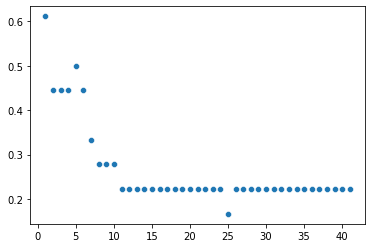

In [12]:
# for better understanding lets plot it
%matplotlib inline
k = [i for i in range(1,42)]
score = list(map(getScore,k))
sns.scatterplot(x=k,y=score)

In [13]:
# max score is at k =1 (0.611) and then on k = 5 (0.5)
# now lets see predicted values for k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred #predicted values of X_test

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4, 1, 1, 2], dtype=int64)

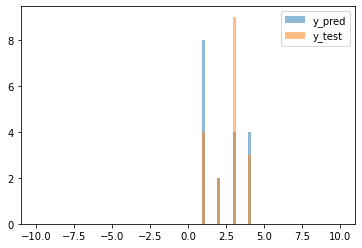

In [14]:
x = y_pred
y = y_test
bins = np.linspace(-10, 10, 100)

plt.hist(x, bins, alpha=0.5, label='y_pred')
plt.hist(y, bins, alpha=0.5, label='y_test')
plt.legend(loc='upper right')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3, 0, 0, 1],
       [0, 2, 0, 0],
       [4, 0, 3, 2],
       [1, 0, 1, 1]], dtype=int64)

In [16]:

# following is the utility function for plotting boundary 
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

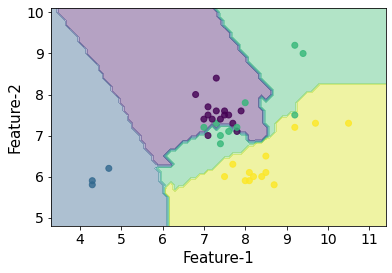

In [17]:
# boundary plot with k = 5
plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
plt.show()

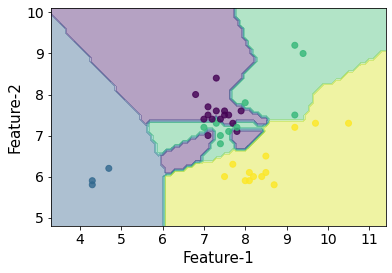

In [18]:
# boundary plot with k = 1
plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=1)
plt.show()

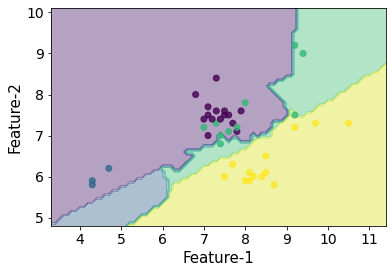

In [19]:
# boundary plot with k = 10
plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=10)
plt.show()